# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from visualize import *
from data_treatments import *
from feature_selection import *
from models import *

from tp.competitive_learning import *
from tp.linear_model import *
from tp.rbfn import *

# Load data

In [2]:
X1 = pd.read_csv("../data/X1.csv") # [7684 rows x 15 columns]
Y1 = pd.read_csv("../data/Y1.csv",sep='\t',names=["Label"]) # [7684 rows x 1 columns]
X2 = pd.read_csv("../data/X2.csv") # [3787 rows x 15 columns]

# X1 = X1.values # converting pandas dataframe to a numpy array

# Visualize data

In [ ]:
#visualize(X1, Y1, 'data.png', True) 

# Data treatments

In [3]:
# step 1 : handle cyclic values

X1_handled = handlecyclic(X1) # handle month, day, hour and wd cyclic features
X1_handled = add_linear_time(X1_handled) # add a global linear time (with year, month, day, hour features)

print(X1_handled.shape)

#print(X1_handled.keys)

(7684, 23)


# Visualize new data

/Users/Noemie/Desktop/EPL/Master/Master2/LELEC2870/Project/machinelearningregression/essai/code/visualize.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=200)


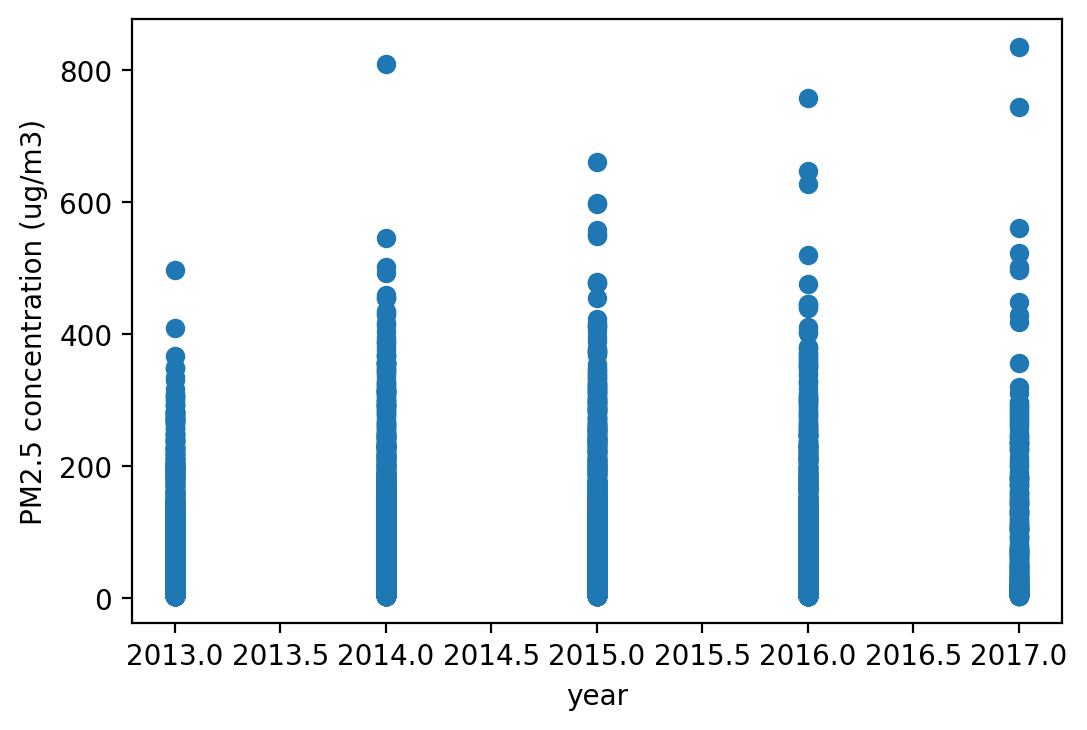

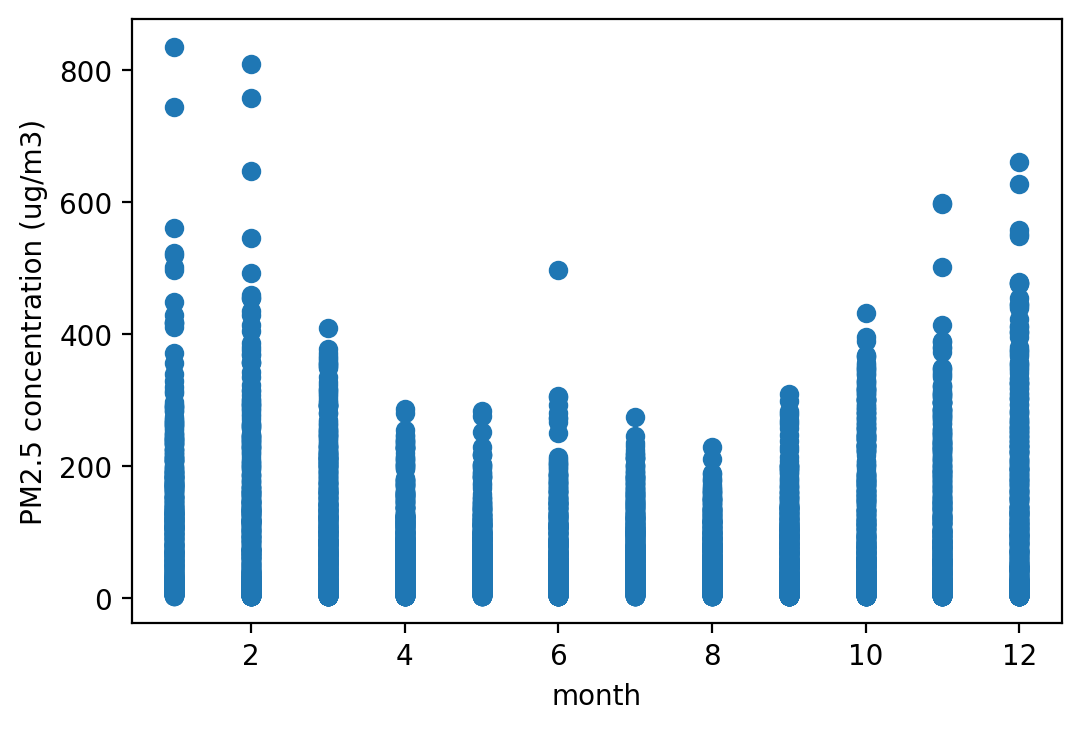

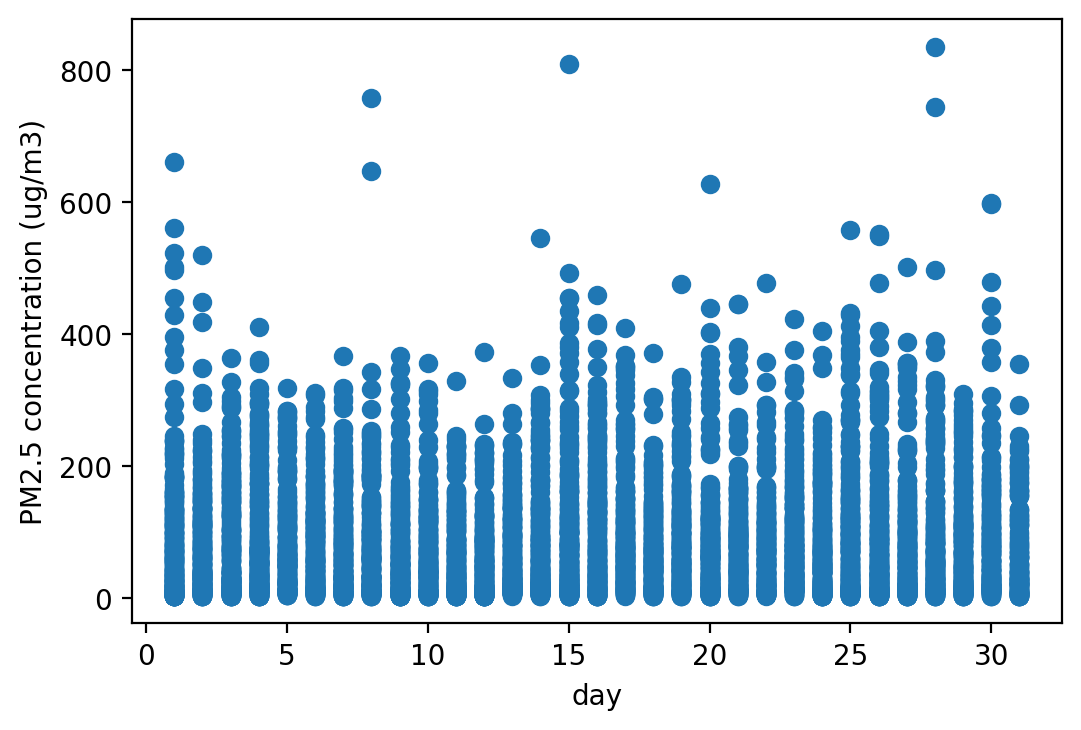

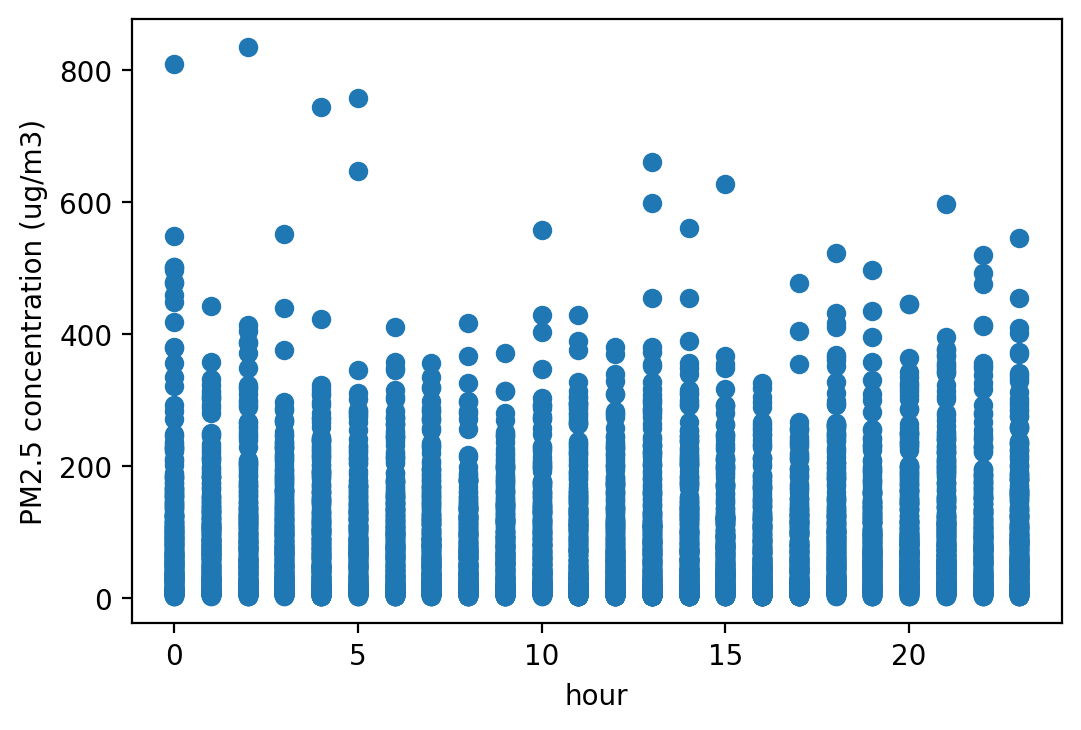

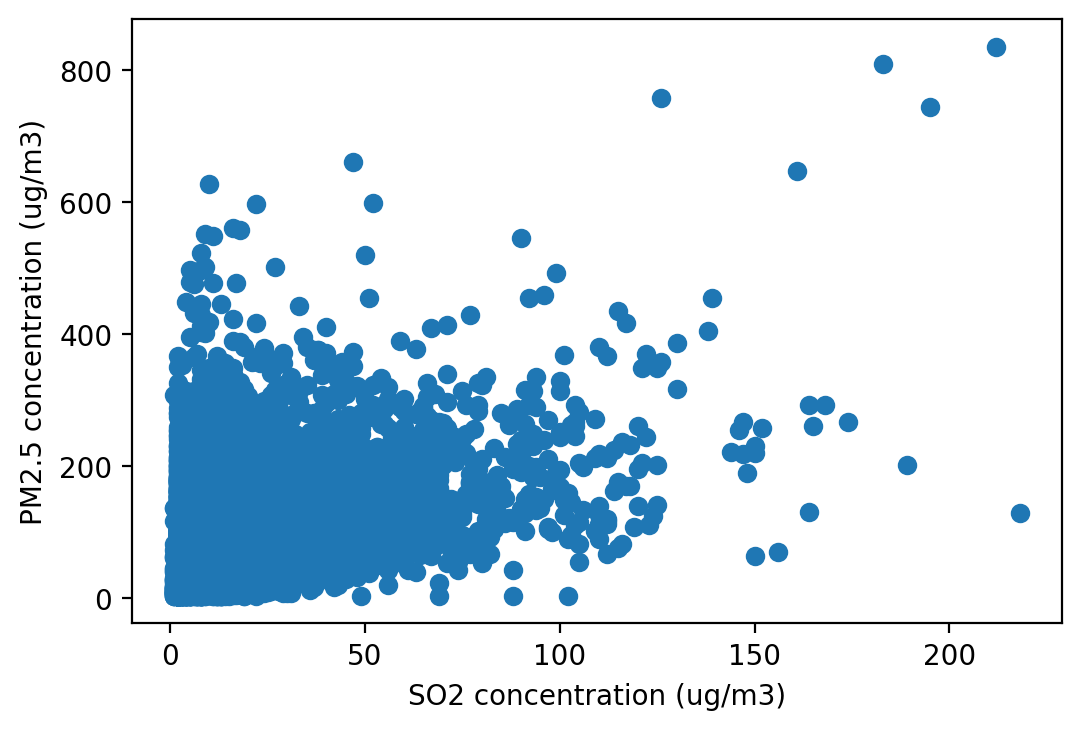

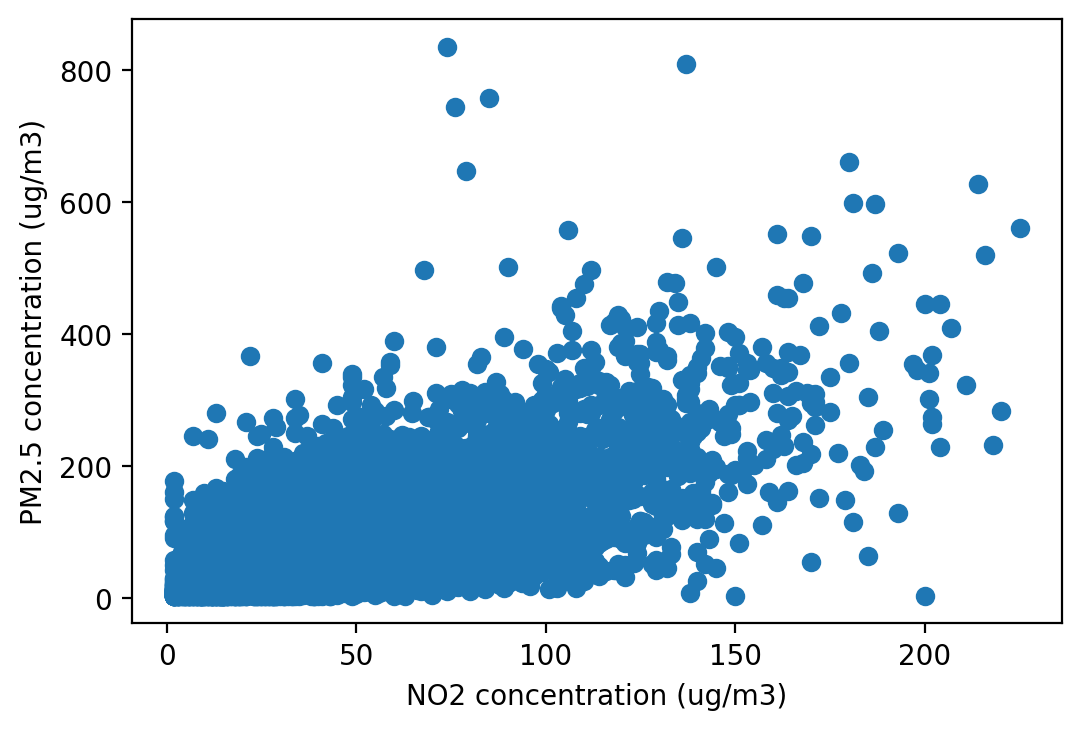

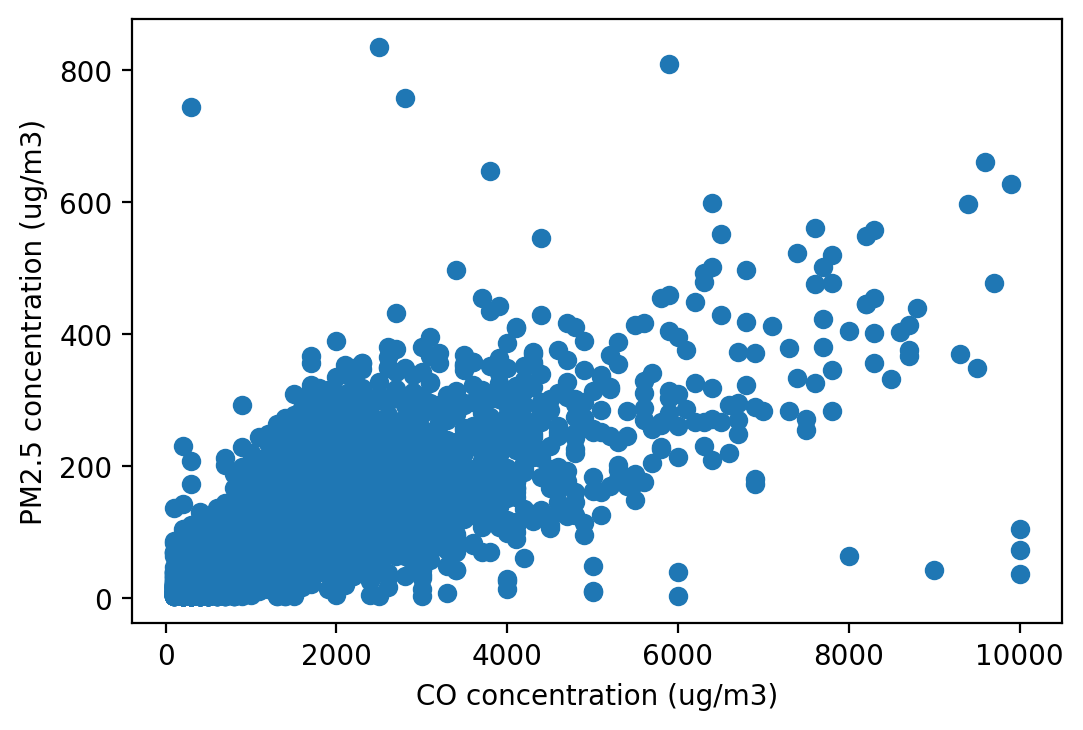

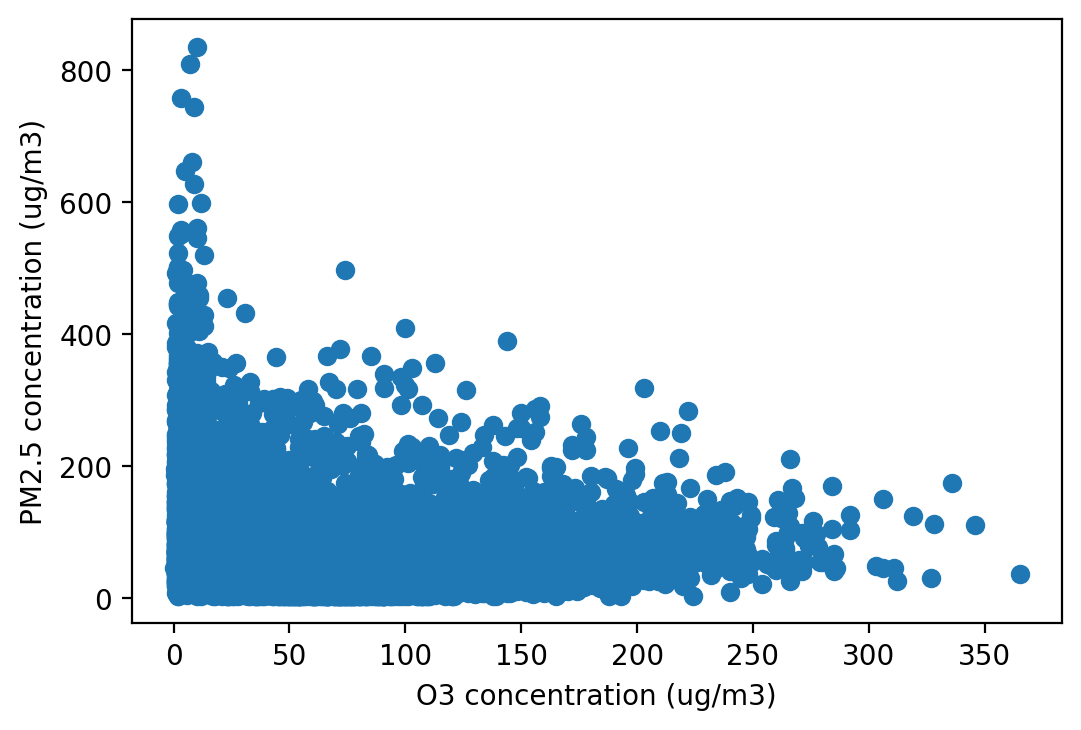

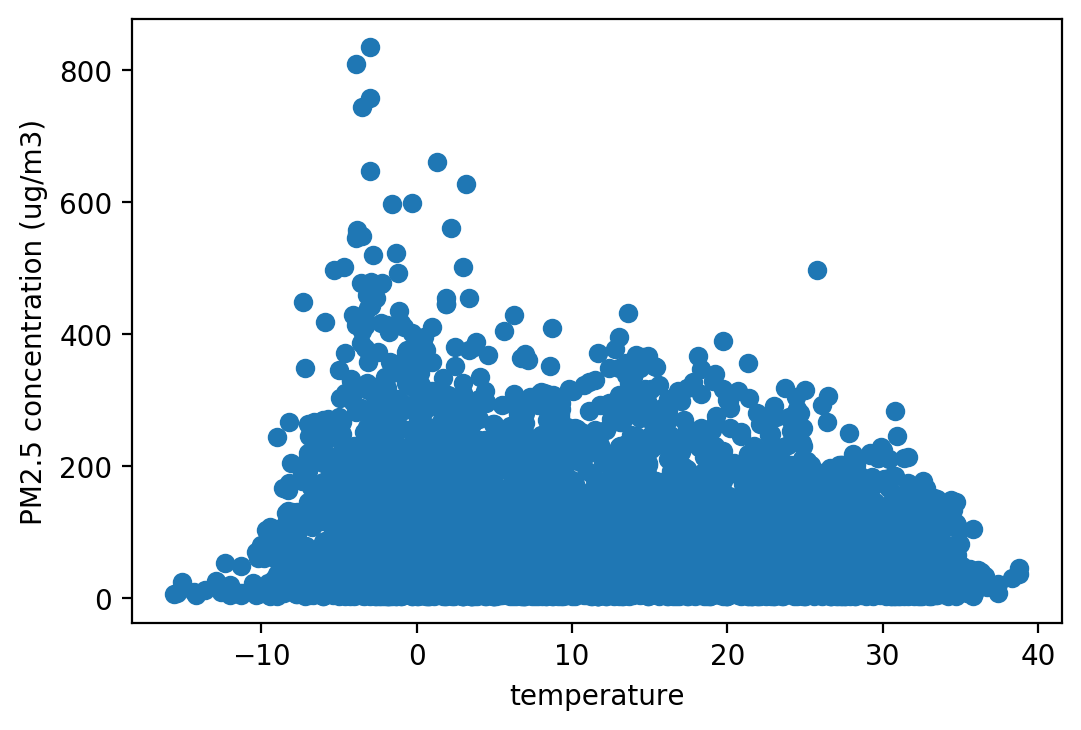

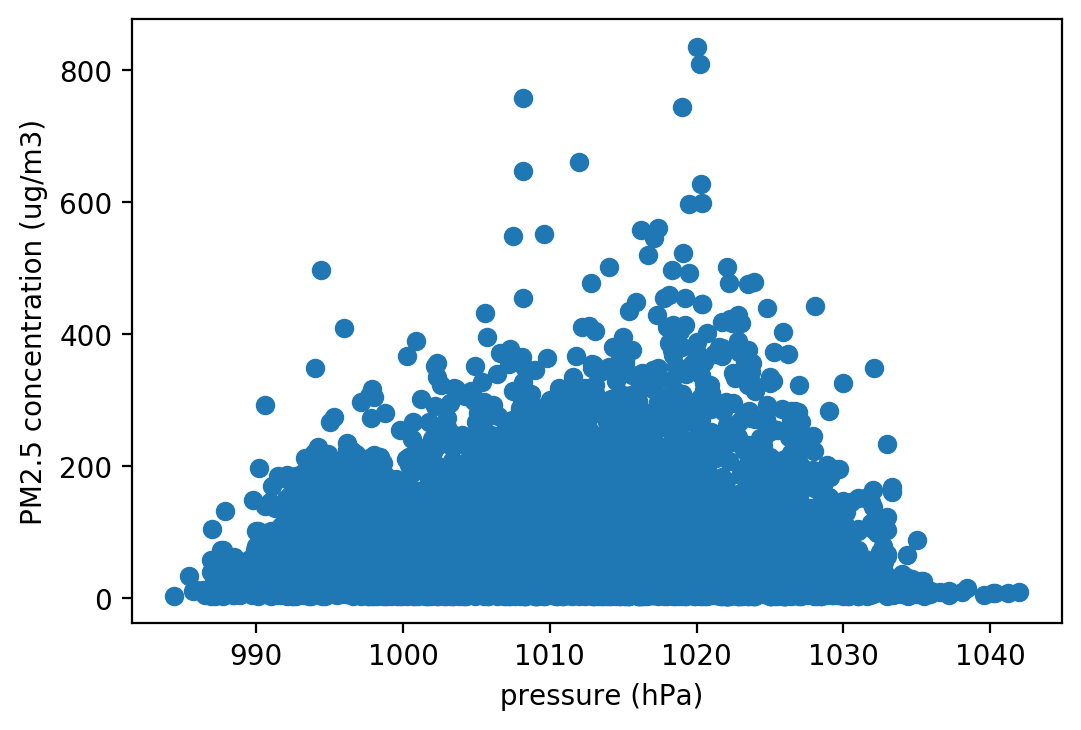

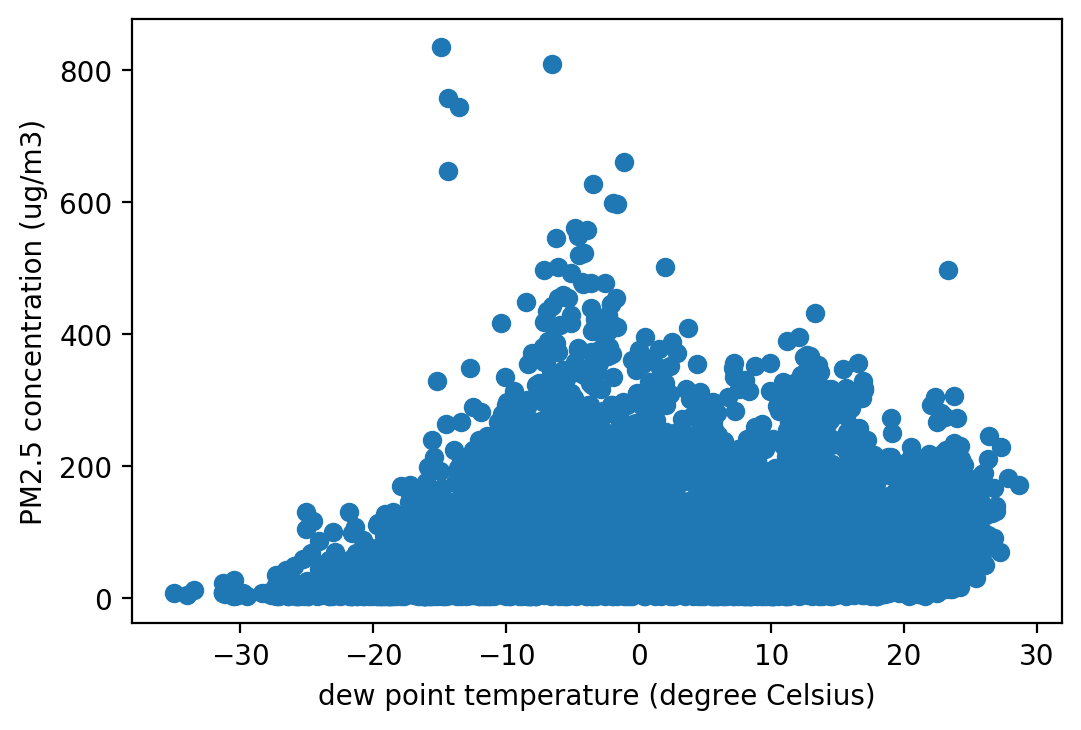

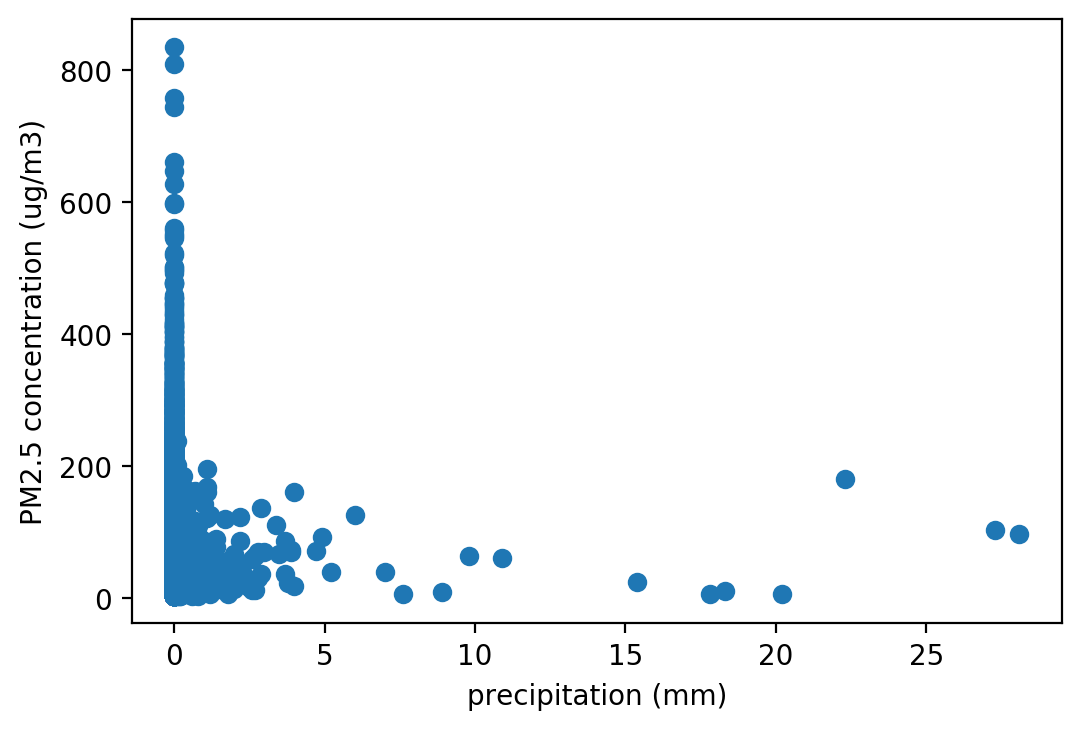

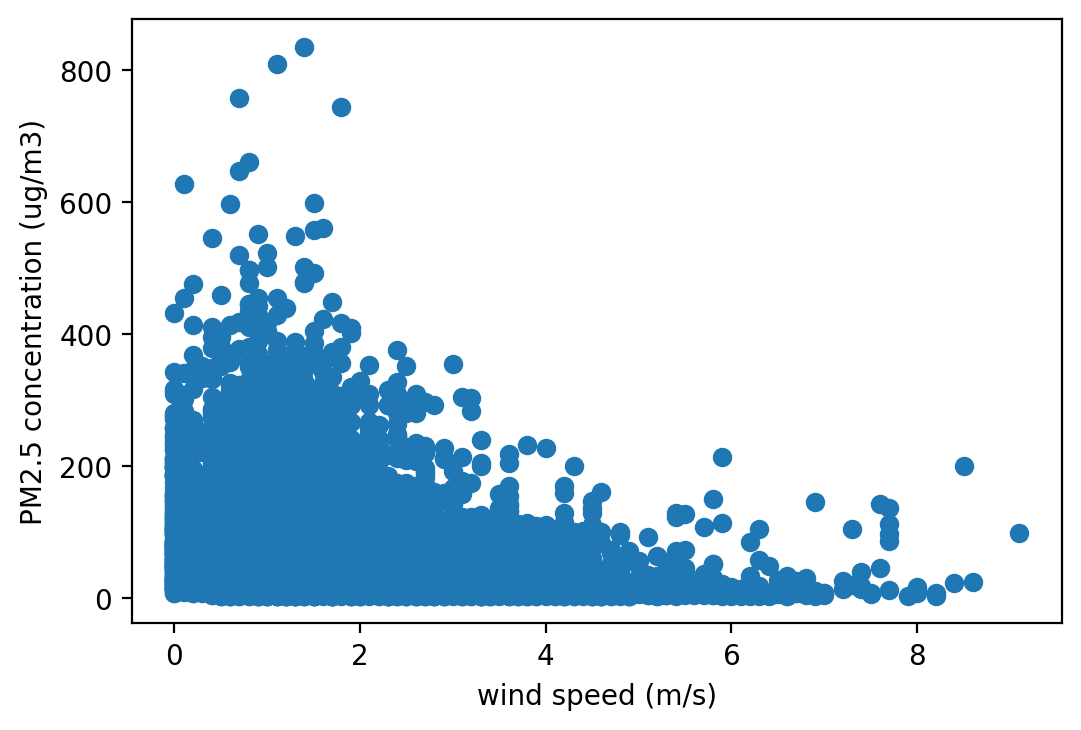

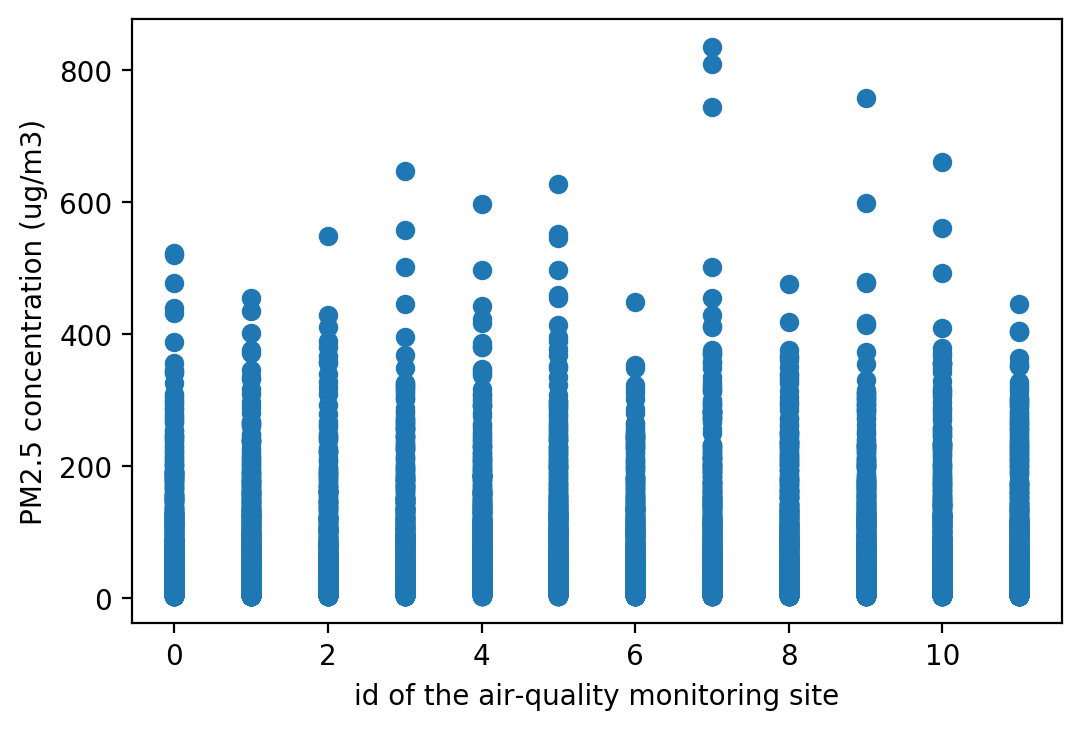

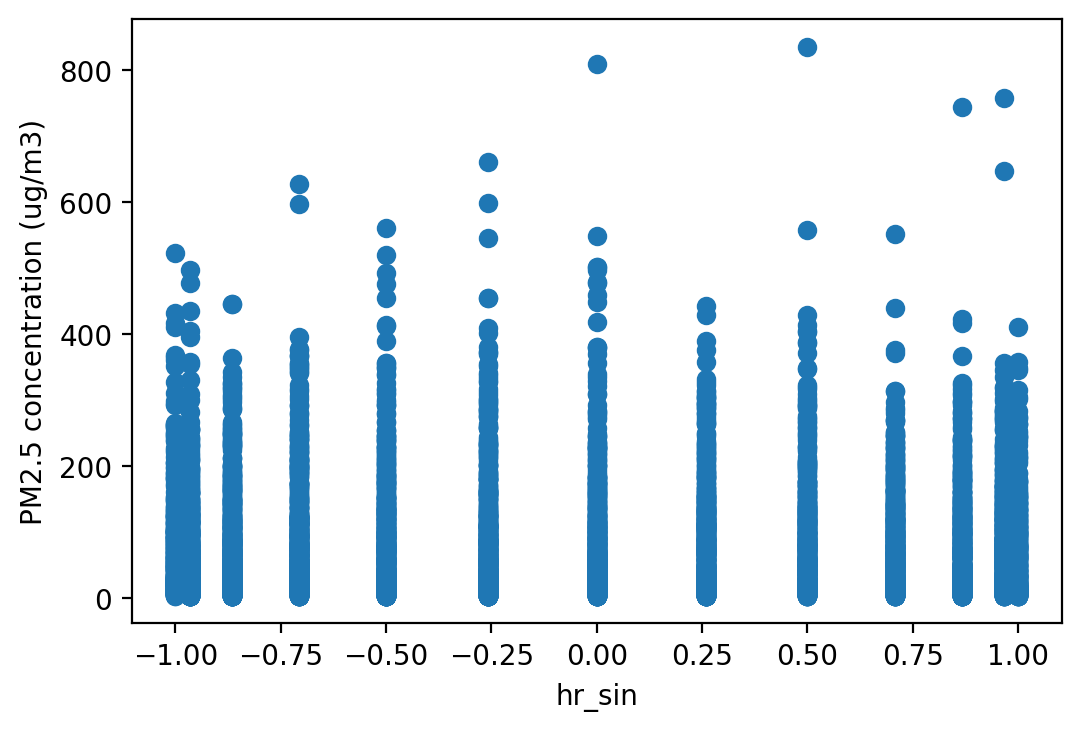

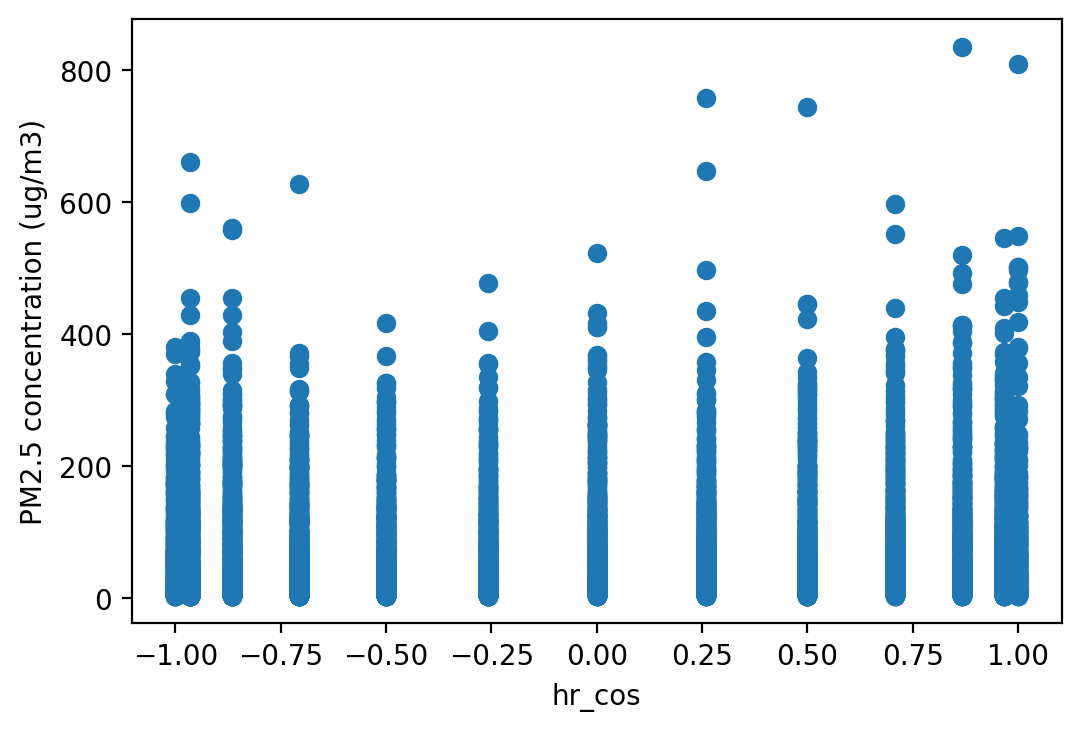

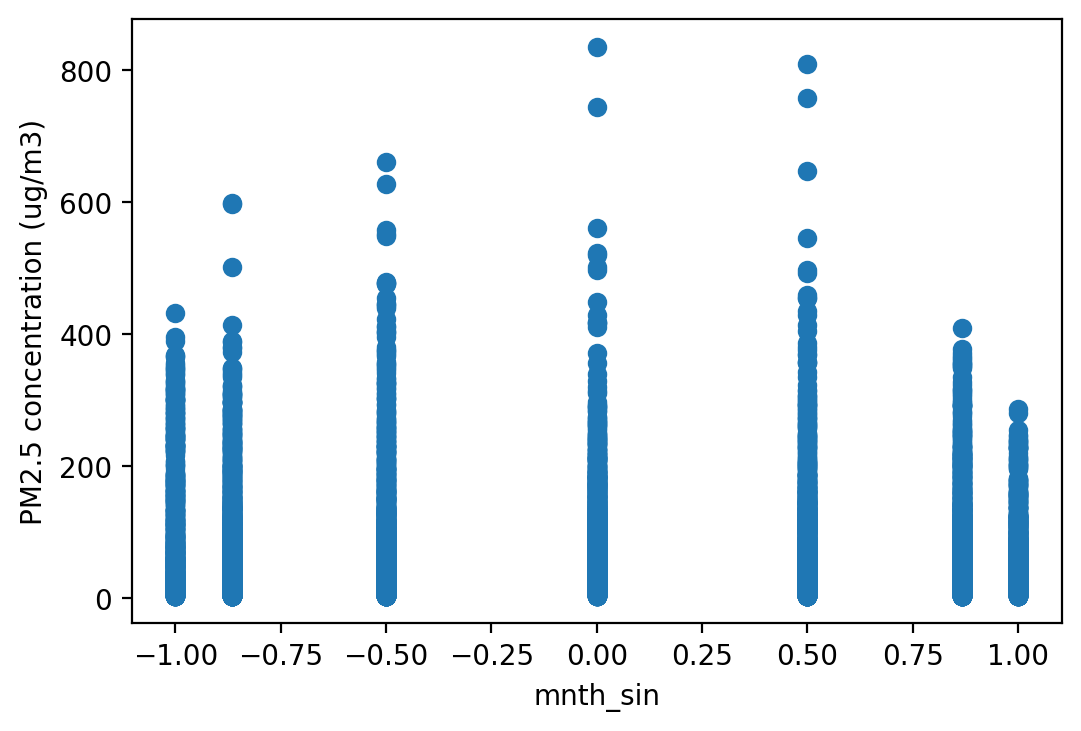

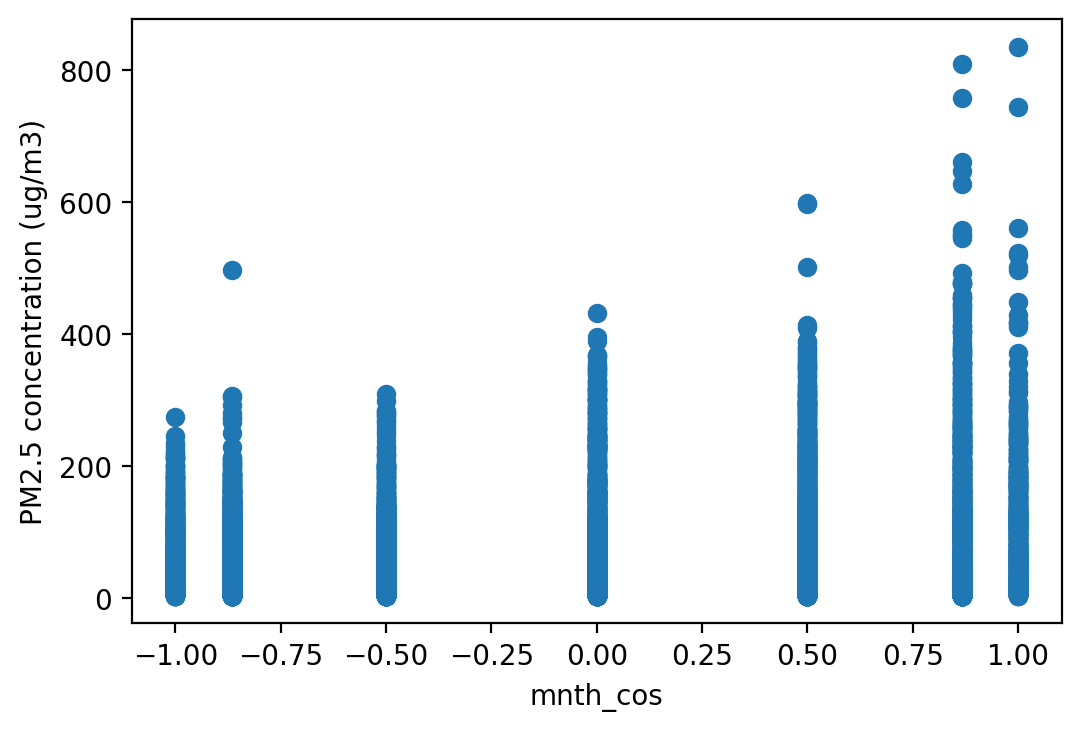

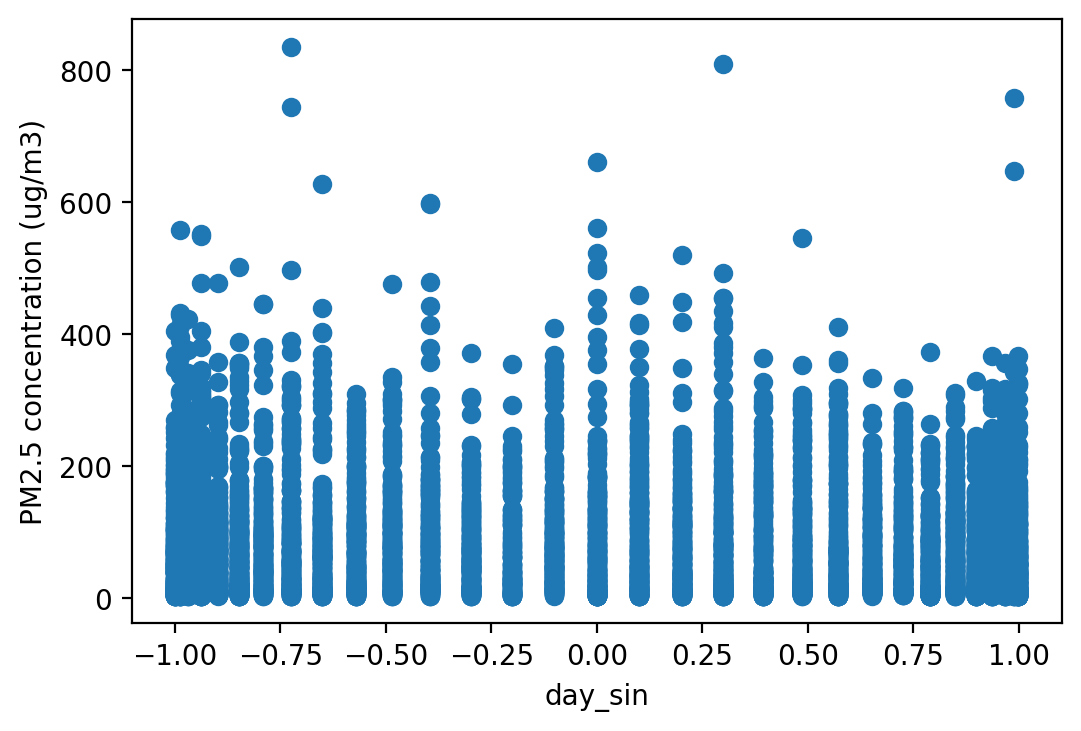

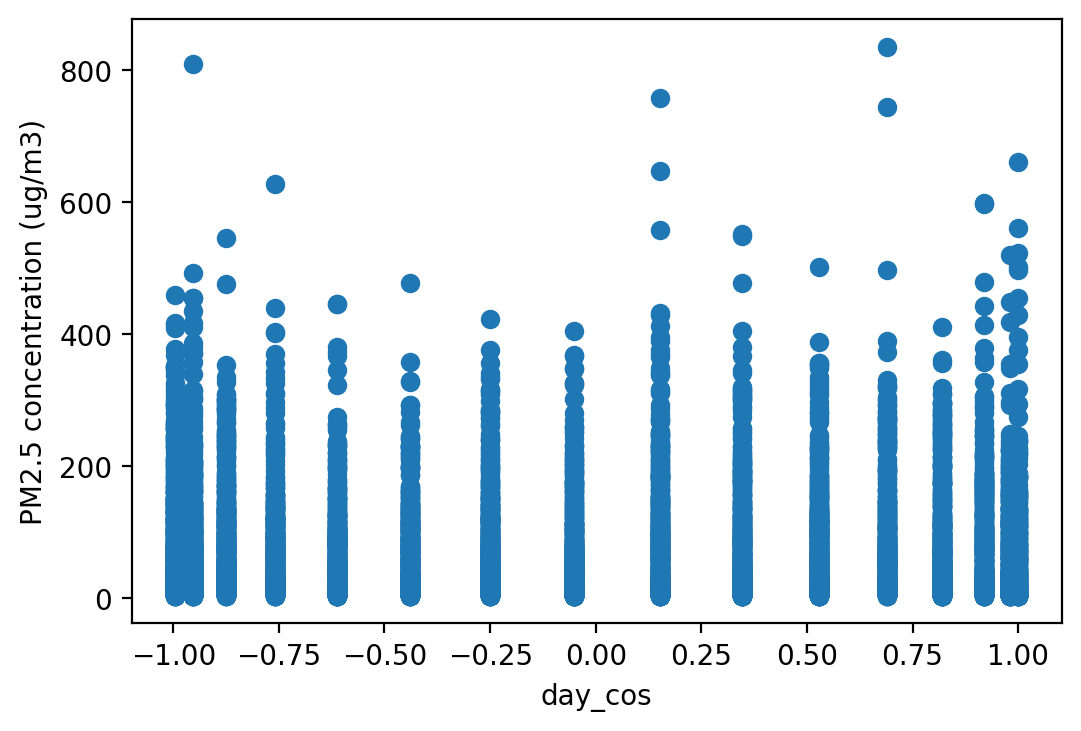

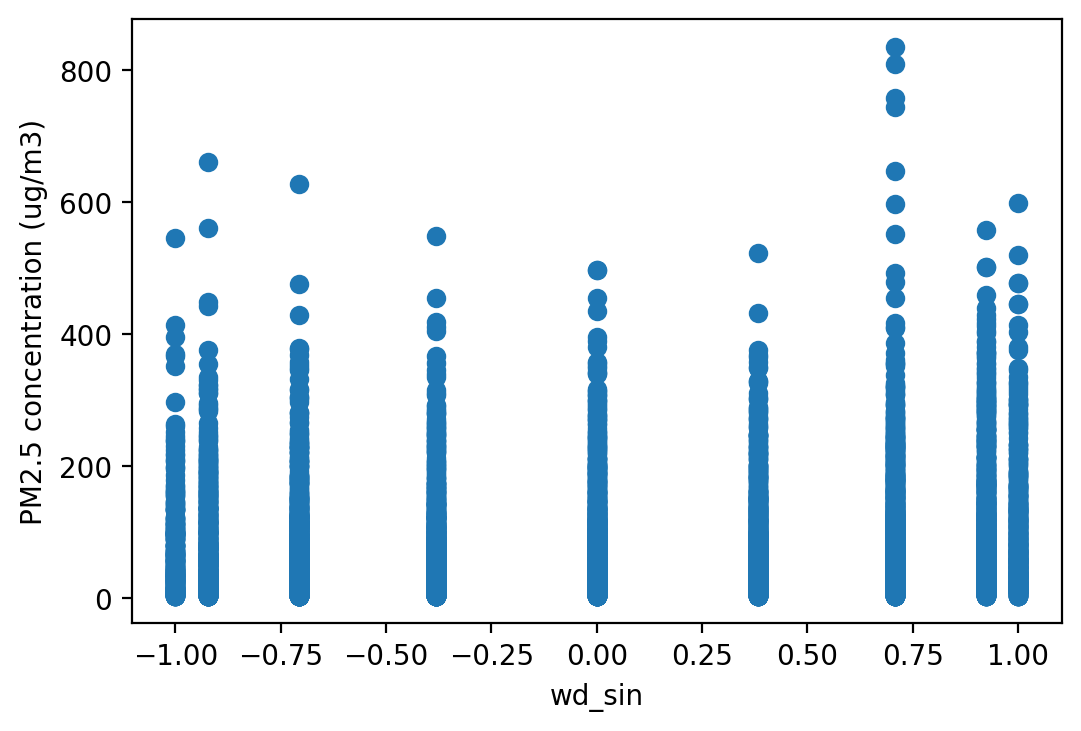

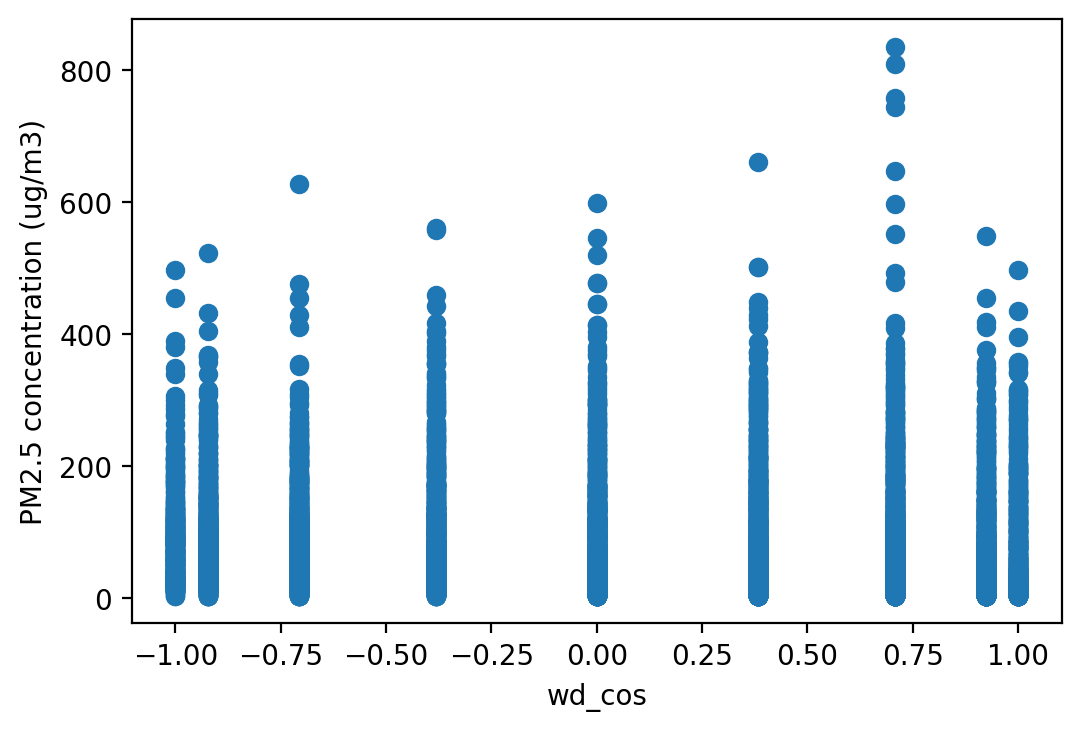

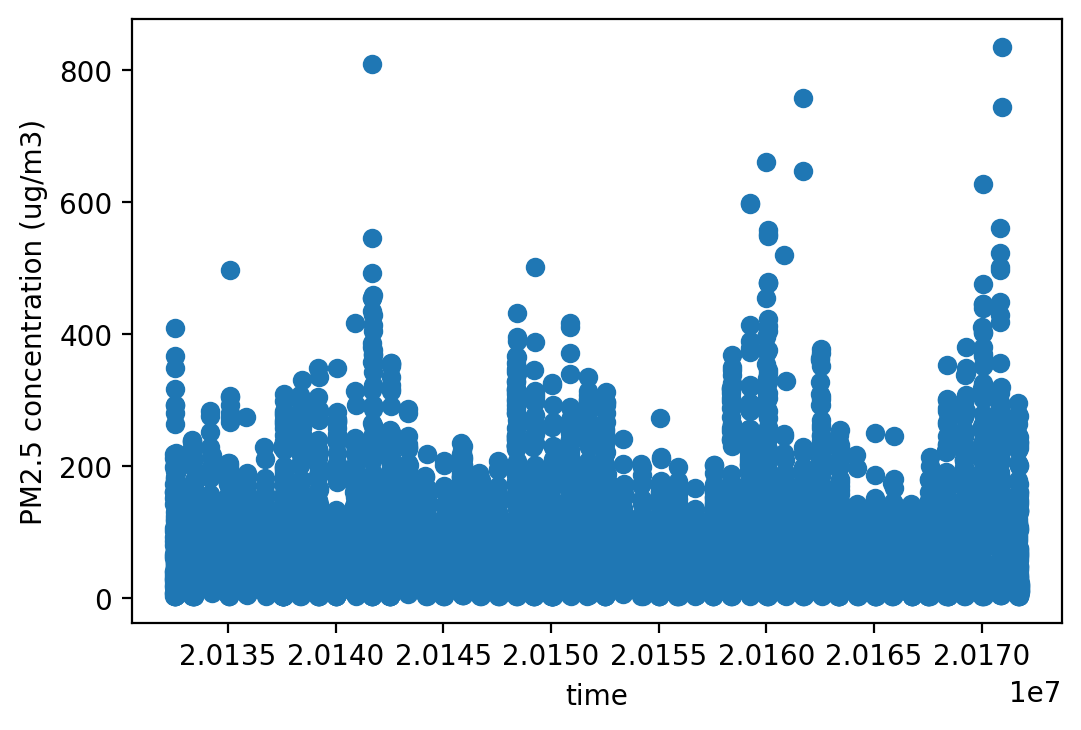

In [4]:
visualize(X1_handled, Y1, 'plots3/new_data', True) 

# Data Splitting

In [5]:
# use of random_state parameter ?
X_train_valid, X_test, Y_train_valid, Y_test = train_test_split(X1_handled, Y1, test_size=0.2, random_state=0)

print(X_train_valid.shape)
print(X_test.shape)
print(Y_train_valid.shape)
print(Y_test.shape)

(6147, 23)
(1537, 23)
(6147, 1)
(1537, 1)


# Normalisation/Standardisation

In [6]:
from scipy.stats import shapiro

'''This funciton takes a imput a dataframe and return a list of the features that are not normal (with threshold alpha)'''
#list = isnormal(X_train_valid)


'This funciton takes a imput a dataframe and return a list of the features that are not normal (with threshold alpha)'

In [11]:
# standardisation
[X_stand,X_stand_test] = stand(X_train_valid, X_test, False)
X_stand = pd.DataFrame(X_stand)
X_stand.columns = X_train_valid.columns
X_stand_test = pd.DataFrame(X_stand_test)
X_stand_test.columns = X_test.columns

# robust scaler (outliers)
[X_trans,X_trans_test] = robust_scaler(X_train_valid, X_test)
X_trans = pd.DataFrame(X_trans)
X_trans.columns = X_train_valid.columns
X_trans_test = pd.DataFrame(X_trans_test)
X_trans_test.columns = X_test.columns


# print mean and variance for each feature and each normalization
'''
print(X_norm.mean(axis=0))
print(X_norm.std(axis=0))

print(X_stand.mean(axis=0))
print(X_stand.std(axis=0))

print(X_trans.mean(axis=0))
print(X_trans.std(axis=0))
'''

'\nprint(X_norm.mean(axis=0))\nprint(X_norm.std(axis=0))\n\nprint(X_stand.mean(axis=0))\nprint(X_stand.std(axis=0))\n\nprint(X_trans.mean(axis=0))\nprint(X_trans.std(axis=0))\n'

# Feature selection

### with standardisation

In [12]:
features = features_selection(X_stand, Y_train_valid.values.ravel(), 7)
X_selected_stand = X_stand[features]
X_test_selected_stand = X_stand_test[features]

print(X_selected_stand.columns)
#print(X_test_selected.columns)

Index(['time', 'TEMP', 'hr_sin', 'DEWP', 'wd_sin', 'PRES', 'mnth_cos', 'CO',
       'SO2', 'NO2', 'O3', 'WSPM'],
      dtype='object')


### with robust_scaler

In [13]:
features = features_selection(X_trans, Y_train_valid.values.ravel(), 7)
X_selected_trans = X_trans[features]
X_test_selected_trans = X_trans_test[features]
print(X_selected_trans.columns)

Index(['time', 'TEMP', 'hr_sin', 'DEWP', 'wd_sin', 'PRES', 'mnth_cos', 'CO',
       'SO2', 'NO2', 'O3', 'WSPM'],
      dtype='object')


# Dimensionality reduction (instead of feature selection) using PCA

In [26]:
from sklearn.decomposition import PCA
#pca = PCA()
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_trans)
X_pca_test = pca.transform(X_trans_test)

X_pca = pd.DataFrame(X_pca)
X_pca_test = pd.DataFrame(X_pca_test)



#print(X_trans.shape)
print(pca.explained_variance_ratio_)
print("pca.explained_variance_ratio_ = ", np.sum(pca.explained_variance_ratio_))


#mi = fs.mutual_info_regression(X_pca, Y_train_valid.values.ravel())
#most_mi =  np.argsort(np.abs(mi))
#for ind in most_mi[len(most_mi)-10: len(most_mi)]:
#    print( "mutual_information = ", mi[ind], '\t \t', ind)

[0.27861774 0.13255798 0.11187994 0.07065274 0.05333407 0.05100441
 0.04624567 0.03785487 0.03642288 0.0322036  0.02672284 0.02238858]
pca.explained_variance_ratio_ =  0.899885336437157


# Building model

In [24]:
def build_model(X_train, Y_train, X_test, Y_test, model):
    rmse = 1000
    
    if model[0]=='linear_regression_tp':
        rmse = linear_regression_tp(X_train, Y_train, X_test, Y_test)
    
    elif model[0] =='rbfn_tp':
        rmse = rbfn_tp(X_train, Y_train, X_test, Y_test, model[1], model[2])
    
    elif model[0] =='KNN':
        rmse = KNN(X_train, Y_train, X_test, Y_test)
    
    elif model[0] =='linear_regression':
        rmse = linear_regression(X_train, Y_train, X_test, Y_test)
    
    elif model[0] =='tree':
        rmse = tree(X_train, Y_train, X_test, Y_test)
    
    elif model[0] =='random_forest':
        rmse = random_forest(X_train, Y_train, X_test, Y_test)
    
    elif model[0] =='MLperceptron':
        rmse = MLperceptron(X_train, Y_train, X_test, Y_test)
    
    elif model[0] =='SVM':
        rmse = SVM(X_train, Y_train, X_test, Y_test)
    
    else:
        print('incorrect value for model')
    return rmse
    
    

### which normalization ?

In [27]:
rmse = build_model(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, ['linear_regression_tp'])
print(rmse)

rmse = build_model(X_selected_trans, Y_train_valid, X_test_selected_trans, Y_test, ['linear_regression_tp'])
print(rmse)

rmse = build_model(X_pca, Y_train_valid, X_pca_test, Y_test, ['linear_regression_tp'])
print(rmse)

'''
45.84108722841297
45.841087228413
45.84108722841298'''

45.84108722841296
45.84108722841298
48.148131457947535


'\n45.84108722841297\n45.841087228413\n45.84108722841298'

# Performance of the models

### with standardisation

In [ ]:
'''

# rbfn tp
[rmse, rmses_train, rmses_test, best] = build_model(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, ['rbfn_tp', [20, 30, 40], [4,8]])
print('rmse rbfn tp : ', rmse)

# KNN
rmse_knn = build_model(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, ['KNN'])
print('rmse knn :', rmse_knn)

# lin reg
rmse_lin_reg = build_model(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, ['linear_regression'])
print('rmse lin reg :', rmse_lin_reg)

# tree
#rmse_tree = build_model(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, ['tree'])
#print('rmse tree : ',rmse_tree)

# mlp
#rmse_mlp = build_model(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, ['MLperceptron'])
#print('rmse mlp : ',rmse_mlp)

# svm (rbfn)
rmse_svm = build_model(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, ['SVM'])
print('rmse svm :',rmse_svm)

'''

### with robust transformation

In [ ]:


# rbfn tp
[rmse, rmses_train, rmses_test, best] = build_model(X_selected_trans, Y_train_valid, X_test_selected_trans, Y_test, ['rbfn_tp', [20, 30, 40], [4,8]])
print('rmse rbfn tp : ', rmse)  # 40.12111959245933

# KNN
rmse_knn = build_model(X_selected_trans, Y_train_valid, X_test_selected_trans, Y_test, ['KNN'])
print('rmse knn :', rmse_knn) # 41.41294425130135

# lin reg
rmse_lin_reg = build_model(X_selected_trans, Y_train_valid, X_test_selected_trans, Y_test, ['linear_regression'])
print('rmse lin reg :', rmse_lin_reg) #45.84108722841296

# tree
rmse_tree = build_model(X_selected_trans, Y_train_valid, X_test_selected_trans, Y_test, ['tree'])
print('rmse tree : ',rmse_tree) # 46.1311463097737

# mlp
#rmse_mlp = build_model(X_selected_trans, Y_train_valid, X_test_selected_trans, Y_test, ['MLperceptron'])
#print('rmse mlp : ',rmse_mlp)

# svm (rbfn)
rmse_svm = build_model(X_selected_trans, Y_train_valid, X_test_selected_trans, Y_test, ['SVM'])
print('rmse svm :',rmse_svm) # 43.463949029766184



#rmse rbfn tp :  39.86998642170184
#rmse knn : 41.41294425130135
#rmse lin reg : 45.84108722841297
#rmse tree :  46.106746036236466
#rmse svm : 43.46394902976619,


# Several plots

### rbfn (tp) : rmse for train and test set, according to number of centroids and scaling factor

In [ ]:
[rmse, rmses_train_rbf, rmses_test_rbf, best] = build_model(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, ['rbfn_tp', [1,2,10,20,50,80,100,150], [4, 8, 16]])
print('rmse rbfn tp : ', rmse)
print(best)

In [ ]:
rmses_train = rmses_train_rbf
rmses_test = rmses_test_rbf
print(rmses_train)

In [ ]:
print(rmses_train)
print(rmses_test)

import matplotlib.pyplot as plt

if True:
    plt.figure(dpi=300)
    plt.title('RMSE for RBF')
    plt.plot([1,2,10,20,50,80,100,150], [rmses_train[1][0], rmses_train[2][0], rmses_train[10][0], rmses_train[20][0], rmses_train[50][0], rmses_train[80][0], rmses_train[100][0], rmses_train[150][0]], label='rmse_train, scaling factor = ')
    plt.plot([1,2,10,20,50,80,100,150], [rmses_test[1][0],  rmses_test[2][0],  rmses_test[10][0],  rmses_test[20][0],  rmses_test[50][0], rmses_test[80][0], rmses_test[100][0], rmses_test[150][0]], label='rmse_test, scaling factor = ')
    plt.xlabel('number of centroids')
    plt.ylabel('RMSE')
    plt.legend()
    #plt.show()
    plt.savefig('rbfn_plot.png')  
    
    '''
    plt.figure(dpi=300)
    plt.title('RMSE for KNN')
    plt.scatter([2,10,20,30,40,50], [rmses_test[2][0], rmses_test[10][0], rmses_test[20][0], rmses_test[30][0], rmses_test[40][0], rmses_test[50][0]], label='rmse_test, scaling factor = 2')
    plt.scatter([2,10,20,30,40,50], [rmses_test[2][1], rmses_test[10][1], rmses_test[20][1], rmses_test[30][1], rmses_test[40][1], rmses_test[50][1]], label='rmse_test, scaling factor = 4')

    plt.xlabel('number of centroids')
    plt.ylabel('RMSE')
    plt.legend()
    #plt.show()
    plt.savefig('rbfn_plot2.png')
    '''
    
    
    
    

In [ ]:
def print_KNN(X_train, Y_train, X_test, Y_test, k_range):
    
    #k_range=list(range(1,31)) + [50,100]
    #k_range= [50,100]
    #k_range=[500,1000]
    
    weight_options = ["uniform"]
    #weight_options = ["distance"]
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsRegressor()
    
    grid = GridSearchCV(knn, param_grid, cv = 5, scoring = M_squared_error)
    grid.fit(X_train,Y_train)

    #print (grid.best_score_)
    #print (grid.best_params_)
    #print (grid.best_estimator_)

    clf = grid.best_estimator_
    clf.fit(X_train,Y_train)

    pred_train = clf.predict(X_train[X_train.columns])
    pred_test = clf.predict(X_test[X_train.columns])
    return [custom_metric(pred_train,Y_train.values),custom_metric(pred_test,Y_test.values)]

In [ ]:
# How vary RMSE according to the number if neighbors, for the train_set and the test_set
rmses_train_knn = list()
rmses_test_knn = list()

for i in range(2, 30):
    [rmse_train, rmse_test] = print_KNN(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, list(range(i-1,i)))
    #print(rmse_train, rmse_test)
    rmses_train_knn.append(rmse_train)
    rmses_test_knn.append(rmse_test)

In [ ]:
import matplotlib.pyplot as plt

if False:
    plt.figure(dpi=300)
    plt.title('RMSE for KNN')
    plt.plot(list(range(1,29)), rmses_train, label='rmse_train')
    plt.plot(list(range(1,29)), rmses_test, label='rmse_test')
    plt.xlabel('n_neighbors parameter')
    plt.ylabel('RMSE')
    plt.legend()
    #plt.show()
    plt.savefig('knn_plot.png')

    plt.figure(dpi=300)
    plt.title('RMSE for KNN')
    plt.scatter(list(range(1,29)), rmses_train, label='rmse_train')
    plt.scatter(list(range(1,29)), rmses_test, label='rmse_test')
    plt.xlabel('n_neighbors parameter')
    plt.ylabel('RMSE')
    plt.legend()
    #plt.show()
    plt.savefig('knn_scatter.png')

In [ ]:
def tree_print2(X_train, Y_train, X_test, Y_test,param_id,depth ):
    
    param_grid = {'max_depth':[depth[param_id]]}
    Tree = DecisionTreeRegressor()

    grid = GridSearchCV(Tree, param_grid, cv = 5, scoring = M_squared_error)
    grid.fit(X_train,Y_train)

    print (grid.best_score_)
    print (grid.best_params_)
    print (grid.best_estimator_)

    clf = grid.best_estimator_
    clf.fit(X_train,Y_train)
    
    pred_train = clf.predict(X_train[X_train.columns])
    pred_test = clf.predict(X_test[X_train.columns])
    
    return [custom_metric(pred_train, Y_train.values), custom_metric(pred_test,Y_test.values)]

In [ ]:
depth = [1,2,3,4,5,6,7,8,9,10,20,40,50]
# How vary RMSE according to the number if neighbors, for the train_set and the test_set
rmses_train_tree = list()
rmses_test_tree = list()
var = range(0, len(depth))
for i in var:
    [rmse_train, rmse_test] = tree_print2(X_selected_trans, Y_train_valid, X_test_selected_trans, Y_test,i,depth)
    rmses_train_tree.append(rmse_train)
    rmses_test_tree.append(rmse_test)

In [ ]:
import matplotlib.pyplot as plt

if True:
    plt.figure(dpi=300)
    plt.title('RMSE for tree')
    plt.plot(depth, rmses_train_tree, label='rmse_train')
    plt.plot(depth, rmses_test_tree, label='rmse_test')
    plt.xlabel('depth of tree')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    #plt.savefig('tree_plot.png')

    plt.figure(dpi=300)
    plt.title('RMSE for tree')
    plt.scatter(depth, rmses_train_tree, label='rmse_train')
    plt.scatter(depth, rmses_test_tree, label='rmse_test')

    plt.xlabel('depth of tree')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    #plt.savefig('tree_scatter.png')

In [ ]:
def print_SVM(X_train, Y_train, X_test, Y_test, c=10, g='auto', e=0.1 ):
    
    svc = svm.SVR(kernel= 'rbf', C=c, gamma=g, epsilon=e)
    #grid = GridSearchCV(svc, parameters, cv=5,scoring = M_squared_error)
    #grid.fit(X_train,Y_train.values.ravel())
    
    svc.fit(X_train,Y_train.values.ravel())
    pred_train = svc.predict(X_train[X_train.columns])
    pred_test = svc.predict(X_test[X_train.columns])

    #print (grid.best_score_)
    #print (grid.best_params_)
    #print (grid.best_estimator_)


    #clf = grid.best_estimator_
    #clf.fit(X_train,Y_train.values.ravel())

    #pred_train = clf.predict(X_train[X_train.columns])
    #pred_test = clf.predict(X_test[X_train.columns])
    return [custom_metric(pred_train,Y_train.values), custom_metric(pred_test,Y_test.values)]

In [ ]:
rmses_train = list()
rmses_test = list()

for c in [1, 10, 100, 200, 300, 1000]:
    [rmse_train, rmse_test] = print_SVM(X_selected_stand, Y_train_valid, X_test_selected_stand, Y_test, c=c)
    rmses_train.append(rmse_train)
    rmses_test.append(rmse_test)
    print(c, rmse_train, rmse_test)

# Outliers

In [ ]:
'''
#The histrogam below plot the output Y1 for the train-valid set
hist = Y_test.hist(bins=300)

i = 400
X_selected_outliers = X_selected.loc[list(Y_train_valid['Label']<i)]
Y_train_valid_outliers = Y_train_valid[list(Y_train_valid['Label']<i)]
print(X_selected.shape)
print(X_selected_outliers.shape)

rmse_lin_reg_outlier = build_model(X_selected_outliers, Y_train_valid_outliers, X_test_selected, Y_test, ['linear_regression'])
rmse_lin_reg_outlier # 45.813509580242254 # with stand, X_test_selected
                    # 46.32600875114827 # with stand, X_test_selected_outlier
rmse_knn_outlier = build_model(X_selected_outliers, Y_train_valid_outliers, X_test_selected, Y_test, ['KNN'])
rmse_knn_outlier # 41.25390056831065 # with stand, X_test_selected
                # 44.26778845376413  # with stand, X_test_selected_outlier
'''